In [135]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold, SelectKBest, mutual_info_regression
import matplotlib.pyplot as plt

In [143]:
dataset = pd.read_csv("Task1_3_Corrected.csv")
dataset = dataset.drop("Unnamed: 0", axis = 1)
dataset.dtypes
objectCols = dataset.select_dtypes(include = ['object'])
numCols = dataset.select_dtypes(include = ['int64', 'float64'])
dataset.head()

,Number_PP,Name,Full_name,Code,Unit_of_reconciliation,Additional_characteristics,Owners_name,Kind,Article,Weight,...,Nomenclature_group,Sharto,Main_supplier,Main_supplier_object,Comment,Predefined,Price,Qty_stock,Remaining_amount,Currency
0,1,(o) Ламинат Symbio,(o) Ламинат Symbio,1920,м2,Нет,Symbio,Товар,1920,Нет,...,Товары,1619658683,NaN,Нет,NaN,Нет,188.96,446.84276,16,Руб
1,2,(o) Ламинат Synchrotec,(o) Ламинат Synchrotec,1921,м2,Нет,Synchrotec,Товар,1921,Нет,...,Товары,162653771,NaN,Нет,NaN,Нет,95.73,720.68925,6,Руб
2,3,(о) Коврики влаговпитывающие,(о) Коврики влаговпитывающие,2037,шт,Нет,Коврики влаговпитывающие,Товар,2037,Нет,...,Товары,162653771,ОПУС ТД ООО,Нет,NaN,Нет,99.83,426.42527,58,Руб
3,4,(о) Ковролин Ideal,(о) Ковролин Ideal,2020,шт,Нет,Ковролин Ideal,Товар,2020,Нет,...,Товары,1993477958,ОПУС ТД ООО,Нет,NaN,Нет,93.28,648.60445,44,Руб
4,5,(о) Ковролин Синтелон (свотч),(о) Ковролин Синтелон (свотч),2390,шт,Нет,Ковролин СИНТЕЛОН (Сербия),Товар,2390,Нет,...,Товары,1993477958,Монарх МБК-М ООО,Нет,NaN,Нет,52.33,905.47358,65,Руб


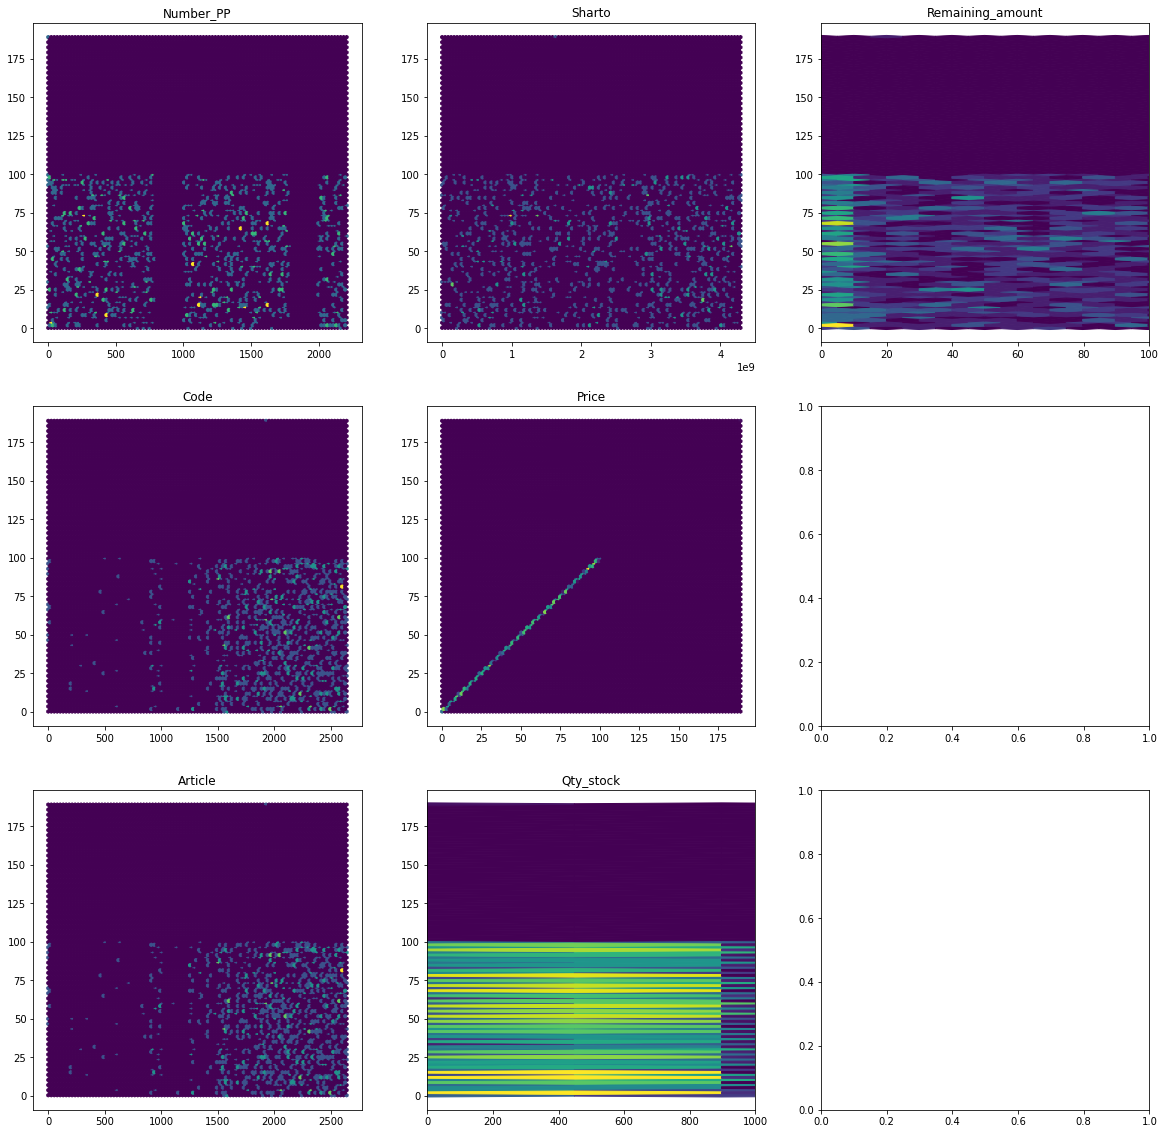

In [137]:
fig, axs = plt.subplots(3,3, figsize=(20,20))
cnt1, cnt2 = 0, 0
for i in numCols:
    dataset = dataset.sort_values(by=i)
    if ((cnt1 == 0 and cnt2 == 2)): 
        axs[cnt1, cnt2].set_xlim([0,100])
    if (cnt1 == 2 and cnt2 == 1):
        axs[cnt1, cnt2].set_xlim([0,1000])
    axs[cnt1, cnt2].hexbin(dataset[i], dataset.Price)
    axs[cnt1, cnt2].set_title(i)
    cnt1 += 1
    if (cnt1 >= 3):
        cnt1 = 0
        cnt2 += 1

Вероятно, что существующие в данном датасете числовые элементы несут малое значение для цены. Полагаю, что резкие пики цены, представленные на каждом графике, относятся к одному и тому же объекту. Посмотрим на текстовые величины, но сначала их надо закодировать.

In [138]:
encoder = preprocessing.LabelEncoder()
objectCols = dataset.select_dtypes(include = ['object'])
for i in objectCols:
    for j in range(0, len(dataset[i])):
        dataset[i][j] = str(dataset[i][j])
    encoder = preprocessing.LabelEncoder()
    dataset[i] = encoder.fit_transform(dataset[i])


dataset.head()

<ipython-input-138-12835912bdeb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[i][j] = str(dataset[i][j])


,Number_PP,Name,Full_name,Code,Unit_of_reconciliation,Additional_characteristics,Owners_name,Kind,Article,Weight,...,Nomenclature_group,Sharto,Main_supplier,Main_supplier_object,Comment,Predefined,Price,Qty_stock,Remaining_amount,Currency
126,177,123,80,1985,14,0,90,0,1985,0,...,1,3411427813,0,1,2,0,72.25,0.0000,0,0
828,1475,814,734,2196,14,0,106,1,2196,0,...,1,3595723222,0,1,2,0,23.58,45.1061,1,0
671,1240,661,595,1970,12,0,109,2,1970,0,...,1,2248310176,0,1,2,0,7.78,45.3500,1,0
358,547,352,305,1604,9,0,53,1,1604,0,...,1,1171195737,0,1,2,0,10.38,695.7214,1,0
624,1161,614,549,2638,9,0,61,1,2638,0,...,1,625203922,0,1,2,0,8.39,190.1594,1,0


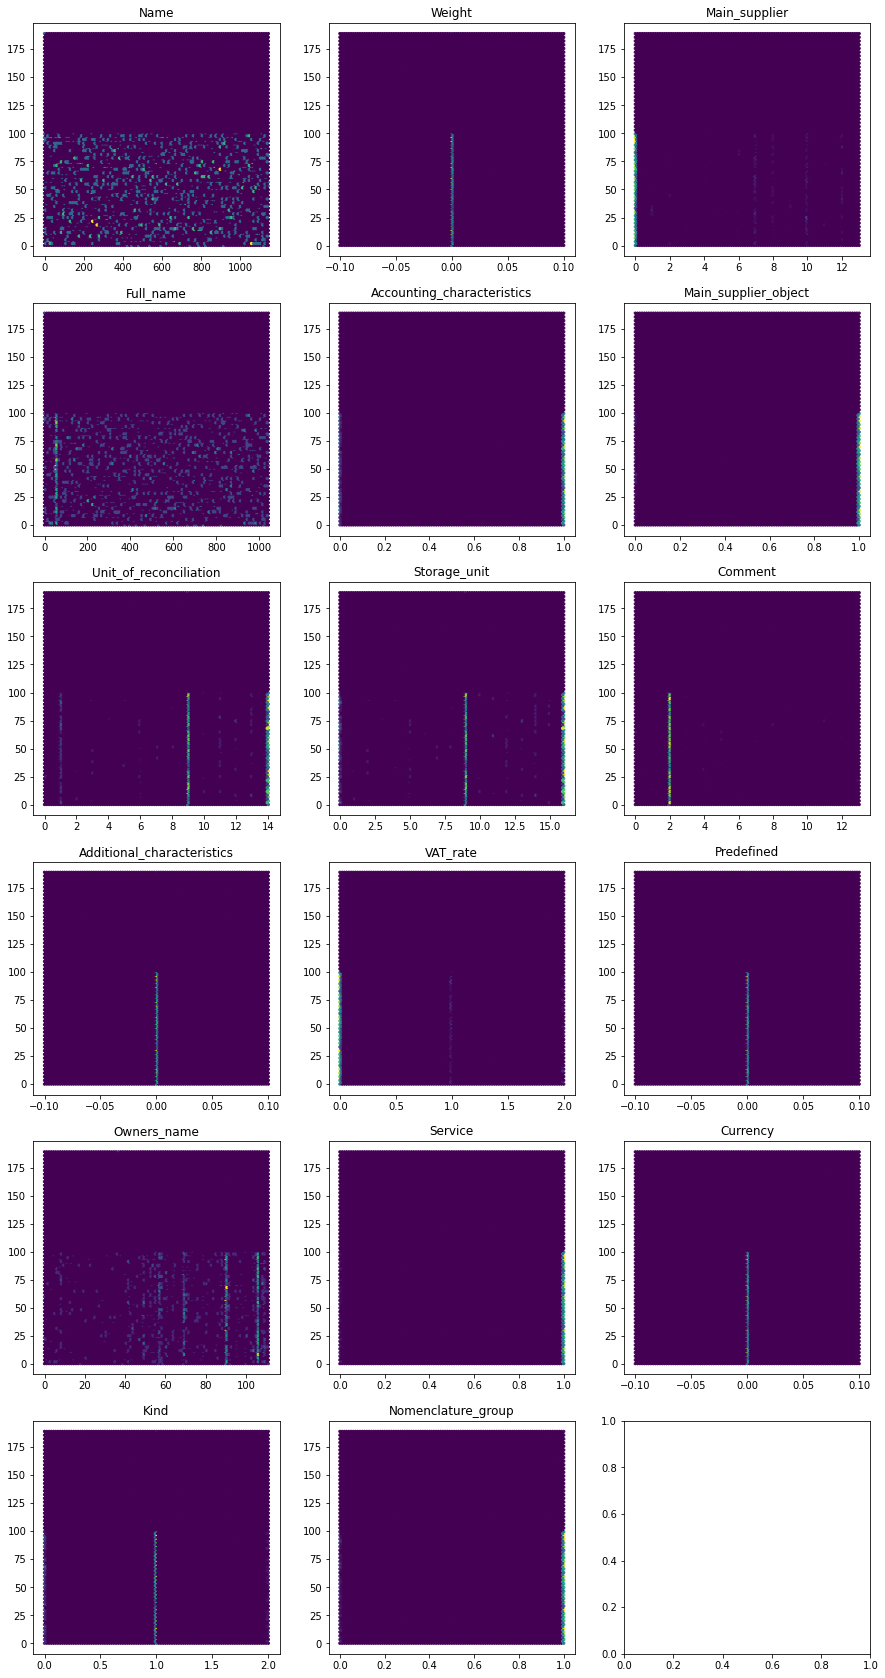

In [139]:
fig, axs = plt.subplots(6, 3, figsize=(15,30))
cnt1, cnt2 = 0, 0
for i in objectCols:
    dataset = dataset.sort_values(by=i)
    axs[cnt1, cnt2].hexbin(dataset[i], dataset.Price)
    axs[cnt1, cnt2].set_title(i)
    cnt1 += 1
    if (cnt1 >= 6):
        cnt1 = 0
        cnt2 += 1

Очевидно, что Additional_characteristics, Predefined, Weight и Currency не являются ни основными, ни побочными критериями, поскольку в датасете представлен лишь один класс данного признака.
VAT_rate, скорее всего, является побочным признаком, нежели основным. 
Видно, что графики не очень хорошо справляются с иллюстрацией зависимостей

Попробуем посмотреть на выборку признаков несколькими моделями. Для этого воспользуемся модулем sklearn.

In [140]:
# Удаление статических признаков (одинаковых в более, чем 80% случаев)
X = dataset.copy(deep=True)
print(X.shape)
sel = VarianceThreshold(threshold=(.8*(1-.8)))
pd.DataFrame(sel.fit_transform(X)).head()

(1157, 24)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1433.0,780.0,700.0,2636.0,9.0,26.0,1.0,2636.0,0.0,9.0,0.0,1.375821e+09,12.0,0.0,64.36,382.24585,52.0
1,412.0,263.0,218.0,1620.0,9.0,49.0,1.0,1620.0,1.0,9.0,0.0,3.752092e+09,0.0,2.0,89.11,549.48921,39.0
2,10.0,6.0,6.0,2127.0,9.0,2.0,1.0,2127.0,0.0,9.0,0.0,7.238860e+08,10.0,1.0,14.15,3962.00000,280.0
3,633.0,401.0,351.0,1761.0,9.0,57.0,1.0,1761.0,1.0,9.0,0.0,3.848317e+09,0.0,2.0,39.76,294.11689,44.0
4,1402.0,755.0,675.0,1421.0,9.0,8.0,1.0,1421.0,1.0,9.0,0.0,9.475301e+08,0.0,2.0,72.10,504.36293,4.0


К сожалению, из-за удаления статических параметров мы потеряли имена стобцов, однако количество измерений радикально сократилось.
Не уверен, однако, что это поможет в дальнейшем обучении
Попробуем посмотреть на очки характеристик при выборе К лучших.

In [141]:
X = dataset.copy(deep=True)
y = X.Price
X = X.drop('Price', axis = 1)
column_names = X.columns
fs = SelectKBest(score_func = mutual_info_regression, k = 'all')
fs.fit(X, y)
top = sorted(zip(column_names, fs.scores_), key=lambda x: x[1], reverse=True)
for i in top:
    print(f'{i[0]}: {i[1]}')

Owners_name: 0.03748288602485017
Number_PP: 0.037328293520971556
Qty_stock: 0.036532144274246114
Name: 0.022773643869249405
Full_name: 0.021595851062426785
Kind: 0.0019175283689887301
Remaining_amount: 0.0017047164622154831
Additional_characteristics: 1.887379141862766e-15
Weight: 1.887379141862766e-15
Predefined: 1.887379141862766e-15
Currency: 1.887379141862766e-15
Code: 0.0
Unit_of_reconciliation: 0.0
Article: 0.0
Accounting_characteristics: 0.0
Storage_unit: 0.0
VAT_rate: 0.0
Service: 0.0
Nomenclature_group: 0.0
Sharto: 0.0
Main_supplier: 0.0
Main_supplier_object: 0.0
Comment: 0.0


Приведенные выше параметры -- Величина коррелированности величин, т.е. их зависимости между собой. Чем меньше зависимость, тем более эти величины независимы. По данным видно, что первые 7 характеристик являются основными, а остальные, до характеристики Code невключительно -- побочные. После Code идут характеристики, вообще никак не влияющие на цены, поэтому их можно отбросить. Думаю, что стоит оставить характеристики по Remaining_amount, поскольку корреляция следующих характеристик крайне мала или ноль.

In [142]:
X = dataset.copy(deep=True)
y = X.Price
X = X.drop('Price', axis = 1)
X = X.sort_index(axis=1)
print(X.columns)
column_names = X.columns
fs = SelectKBest(score_func = mutual_info_regression, k = 7)
X = fs.fit_transform(X, y)
n_columns_selected = X.shape[0]
new_columns = list(sorted(zip(fs.scores_, column_names), reverse=True))
print(*new_columns[:7], sep='\n')
X = pd.DataFrame(X, columns = [i[1] for i in sorted(new_columns[:7], key=lambda x: x[1])])
X.insert(7, 'Price', y)
X.head()
X.to_csv("Day2_PickedKBest.csv")

Index(['Accounting_characteristics', 'Additional_characteristics', 'Article',
       'Code', 'Comment', 'Currency', 'Full_name', 'Kind', 'Main_supplier',
       'Main_supplier_object', 'Name', 'Nomenclature_group', 'Number_PP',
       'Owners_name', 'Predefined', 'Qty_stock', 'Remaining_amount', 'Service',
       'Sharto', 'Storage_unit', 'Unit_of_reconciliation', 'VAT_rate',
       'Weight'],
      dtype='object')
(0.03766414582851185, 'Number_PP')
(0.03639292208266154, 'Qty_stock')
(0.03466281852373543, 'Owners_name')
(0.02284609216650546, 'Name')
(0.01951840754393741, 'Full_name')
(0.007702044507781114, 'Remaining_amount')
(0.003970152048227593, 'Kind')
